In [1]:
from learningAgent import LearningAlgorithm
from environment import Model, AdversaryModes
from Qtable import QTable
from test import Test
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
np.random.seed(11)

In [3]:
total_demand = 400
agent_cost = 57
adversary_cost = 71 
costs = [agent_cost,adversary_cost]
total_stages = 25
adversary_probabilities=[0]*len(AdversaryModes)
# Below is where we decide what adversaries we train against- see environment.py for the numbers
# Replace * and ** with the two number associated with the opponents at the bottom of environment.py
# adversary_probabilities[10]= 0.5
adversary_probabilities[11] = 1
game = Model(total_demand, costs, total_stages, adversary_probabilities)

In [4]:
number_actions = 50
number_demands = total_demand + 1
discount_factor = 1
number_episodes = 100_000_000
constant = int(number_episodes/49)
print(constant)

2040816


In [5]:
# Learning rate is given as [numerator,denominator] which gives us a learning rate function of 
# numerator/(n+denominator)
Qtable = QTable(number_demands, number_actions, total_stages , learning_rate = [constant,constant])

In [6]:
algorithm = LearningAlgorithm(game, Qtable, number_episodes, discount_factor)

0 0.594349701531621
Current payoff for adversary 1:  34687.0
Current payoff for adversary 2:  79941.0
Current payoff for adversary 1:  73981.0
Current payoff for adversary 2:  70645.0
Current payoff for adversary 1:  78665.0
Current payoff for adversary 2:  101521.0
Current payoff for adversary 1:  98645.0
Current payoff for adversary 2:  83760.0
Current payoff for adversary 1:  99592.0
Current payoff for adversary 2:  84035.0
Current payoff for adversary 1:  92889.0
Current payoff for adversary 2:  91975.0
Current payoff for adversary 1:  82468.0
Current payoff for adversary 2:  81975.0
Current payoff for adversary 1:  92860.0
Current payoff for adversary 2:  98432.0
Current payoff for adversary 1:  85632.0
Current payoff for adversary 2:  97482.0
Current payoff for adversary 1:  96170.0
Current payoff for adversary 2:  99178.0
Current payoff for adversary 1:  98218.0
Current payoff for adversary 2:  92285.0
Current payoff for adversary 1:  98634.0
Current payoff for adversary 2:  960

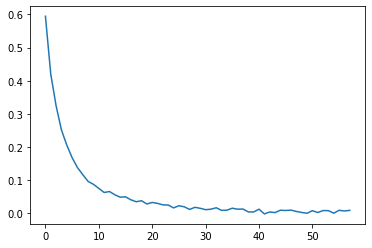

In [7]:
# Below is the first stage of learning- actions are chosen randomly.
number_episodes_per_round = 100_000
number_rounds = int(number_episodes / number_episodes_per_round)
errors = np.zeros(number_rounds)
final_round = 0
opponent1_results = list()
#opponent2_results = list()
for round_ in range(number_rounds):
    algorithm.continue_learning(number_episodes_per_round,number_episodes_per_round * round_ +1)
    adversary_probabilities[11]= 1
    # adversary_probabilities[11] = 0.5
    result = Test(game, Qtable, discount_factor, adversary_probabilities)
    errors[round_] = result.error(1000)
    if round_ % 50 == 0:
        print(round_, errors[round_])
    if round_ > 10 and np.max(errors[round_-10:round_]) < 0.01:
        print(round_)
        final_round = round_
        break
        
    adversary_probabilities=[0]*len(AdversaryModes)
    adversary_probabilities[11]=1
    result = Test(game, Qtable, discount_factor, adversary_probabilities)
    payoff1, adversary_payoff, actions, adversary_actions, demand_potential = result.total_payoff()
    opponent1_results.append(payoff1)
    print('Current payoff for adversary 1: ', payoff1)
    
   # adversary_probabilities=[0]*len(AdversaryModes)
   # adversary_probabilities[11]=1
   # result = Test(game, Qtable, discount_factor, adversary_probabilities)
   # payoff2, adversary_payoff, actions, adversary_actions, demand_potential = result.total_payoff()
    # opponent2_results.append(payoff2)
    # print('Current payoff for adversary 2: ', payoff2)
    
    if (round_ == number_rounds - 1):
        final_round = round_
    
plt.plot(errors[0:final_round+1])

In [ ]:
# Below is the second stage of learning- actions are chosen according to an epsilon greedy strategy.
episode_counter = (final_round + 1) * number_episodes_per_round
episodes_left = number_episodes - episode_counter
number_episodes_per_round = 500_000
number_rounds = int(episodes_left / number_episodes_per_round)

for round_ in range(number_rounds): 
    print('Round ', round_, ' of ', number_rounds)
    algorithm.epsilon_greedy_learning(number_episodes_per_round, episode_counter)
    
    adversary_probabilities=[0]*len(AdversaryModes)
    adversary_probabilities[11]=1
    result = Test(game, Qtable, discount_factor, adversary_probabilities)
    payoff1, adversary_payoff, actions, adversary_actions, demand_potential = result.total_payoff()
    opponent1_results.append(payoff1)
    print('Current payoff for adversary 1: ', payoff1)
    
#     adversary_probabilities=[0]*len(AdversaryModes)
#     adversary_probabilities[11]=1
#     result = Test(game, Qtable, discount_factor, adversary_probabilities)
#     payoff2, adversary_payoff, actions, adversary_actions, demand_potential = result.total_payoff()
#     opponent2_results.append(payoff2)
#     print('Current payoff for adversary 2: ', payoff2)
    
    episode_counter += number_episodes_per_round
    
plt.plot(opponent1_results)
# plt.plot(opponent2_results)
plt.title("Payoff over the rounds")
plt.xlabel("Rounds")
plt.ylabel("Payoff at the end of each round")
legend = ["adversary 1"]
plt.legend(legend)

Round  0  of  188
Best payoff:  129293
Best actions:  [118, 132, 126, 123, 116, 113, 120, 104, 108, 118, 102, 116, 108, 106, 118, 106, 106, 114, 109, 114, 104, 112, 113, 116, 125]
Current payoff for adversary 1:  126020.0
Current payoff for adversary 2:  116447.0
Round  1  of  188
Best payoff:  130778
Best actions:  [113, 122, 125, 125, 124, 129, 116, 116, 111, 111, 114, 112, 120, 106, 112, 112, 112, 112, 114, 107, 111, 116, 111, 114, 130]
Current payoff for adversary 1:  80594.0
Current payoff for adversary 2:  129385.0
Round  2  of  188
Best payoff:  132640
Best actions:  [111, 125, 125, 125, 125, 125, 122, 117, 119, 113, 111, 115, 113, 112, 111, 112, 117, 111, 113, 114, 111, 112, 116, 113, 130]
Current payoff for adversary 1:  80294.0
Current payoff for adversary 2:  132503.0
Round  3  of  188
Best payoff:  133019
Best actions:  [111, 124, 124, 125, 124, 124, 123, 118, 115, 115, 113, 115, 111, 115, 111, 112, 114, 111, 114, 110, 114, 112, 116, 115, 130]
Current payoff for adversary 1

In [ ]:
Qtable.save("Qtable_guess132_guess128")

df1 = pd.DataFrame(opponent1_results)
#df2 = pd.DataFrame(opponent2_results)

writer = pd.ExcelWriter('payoffs.xlsx', engine='xlsxwriter')
df1.to_excel(writer, sheet_name='payoff1', index=False)
#df2.to_excel(writer, sheet_name='payoff2', index=False)
writer.save()

In [ ]:
# We now have the trained agent. We want to test it against each opponent individually, so that
# we can compare it against the agent that is just trained against this opponent. 

In [ ]:
adversary_probabilities=[0]*len(AdversaryModes)
# Testing against one type of opponent by changing the * below to be the first number
adversary_probabilities[11]=1
result = Test(game, Qtable, discount_factor, adversary_probabilities)
payoff, adversary_payoff, actions, adversary_actions, demand_potential = result.total_payoff()
print(payoff)
print(adversary_payoff)
print(actions)
print(adversary_actions)
print(demand_potential)

In [ ]:
adversary_probabilities=[0]*len(AdversaryModes)
# Testing against one type of opponent by changing the * below to be the first number
adversary_probabilities[11]=1
result = Test(game, Qtable, discount_factor, adversary_probabilities)
payoff, adversary_payoff, actions, adversary_actions, demand_potential = result.total_payoff()
print(payoff)
print(adversary_payoff)
print(actions)
print(adversary_actions)
print(demand_potential)